# DATA VISUALIZATION PROJECT CODES

In [1]:
#setting working directory
getwd()
setwd("C:/Users/metu.osele/OneDrive - Safe Foods Corporation/Documents/School Related Projects/Data Visualization Project")

[1] "C:/Users/metu.osele"

In [31]:
install.packages('tsne')

package 'tsne' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\metu.osele\AppData\Local\Temp\Rtmpk9taD7\downloaded_packages


In [32]:
#downloading libraries 
library(tidyverse)
library(dplyr)  
library(tidyr) 
library(ggplot2) 
library(purrr)
library(tibble)
library(gridExtra)
library(RColorBrewer)
library(tsne)
library(wordcloud2)

Warning message:
"package 'wordcloud2' was built under R version 3.6.3"

# What does the data look like? 

In [3]:
babynames <- read_csv("babynames.csv")
summary(babynames)
head(babynames) #top six values in tibble 
tail(babynames) #last six values in tibble

Parsed with column specification:
cols(
  year = col_double(),
  sex = col_character(),
  name = col_character(),
  n = col_double()
)


      year          sex                name                 n          
 Min.   :1880   Length:2020863     Length:2020863     Min.   :    5.0  
 1st Qu.:1954   Class :character   Class :character   1st Qu.:    7.0  
 Median :1987   Mode  :character   Mode  :character   Median :   12.0  
 Mean   :1977                                         Mean   :  177.4  
 3rd Qu.:2005                                         3rd Qu.:   32.0  
 Max.   :2020                                         Max.   :99693.0  

year,sex,name,n
1880,F,Mary,7065
1880,F,Anna,2604
1880,F,Emma,2003
1880,F,Elizabeth,1939
1880,F,Minnie,1746
1880,F,Margaret,1578


year,sex,name,n
2020,M,Zykeem,5
2020,M,Zykell,5
2020,M,Zylus,5
2020,M,Zymari,5
2020,M,Zyn,5
2020,M,Zyran,5


# What is the the total number of unique names?

In [5]:
length(unique(babynames$name)) 

[1] 100364

# Graph of unique female and male names

Warning message:
"Ignoring unknown aesthetics: fill"

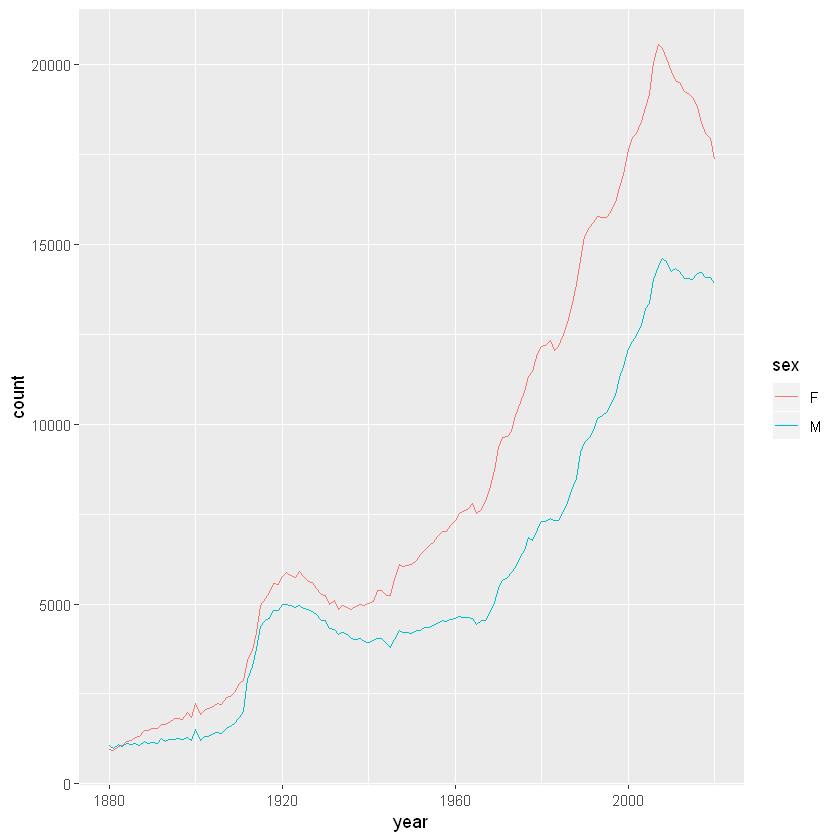

In [8]:
#babynames %>%
#group_by(name)%>%
#split(babynames$sex) #total was 111472 (68,905 females, 42,567 males)

#graph 
babynames %>% 
ggplot() +
geom_line(mapping = aes(x = year, color = sex, fill = sex),stat="count")

#the graph shows the trend of unique femal and male names overtime

#I noticed that total number of unique names was not the same when 
#the data was split v.s. when I used the function "unique", so there must 
#be unisex names. 

# Exploring Unisex names 

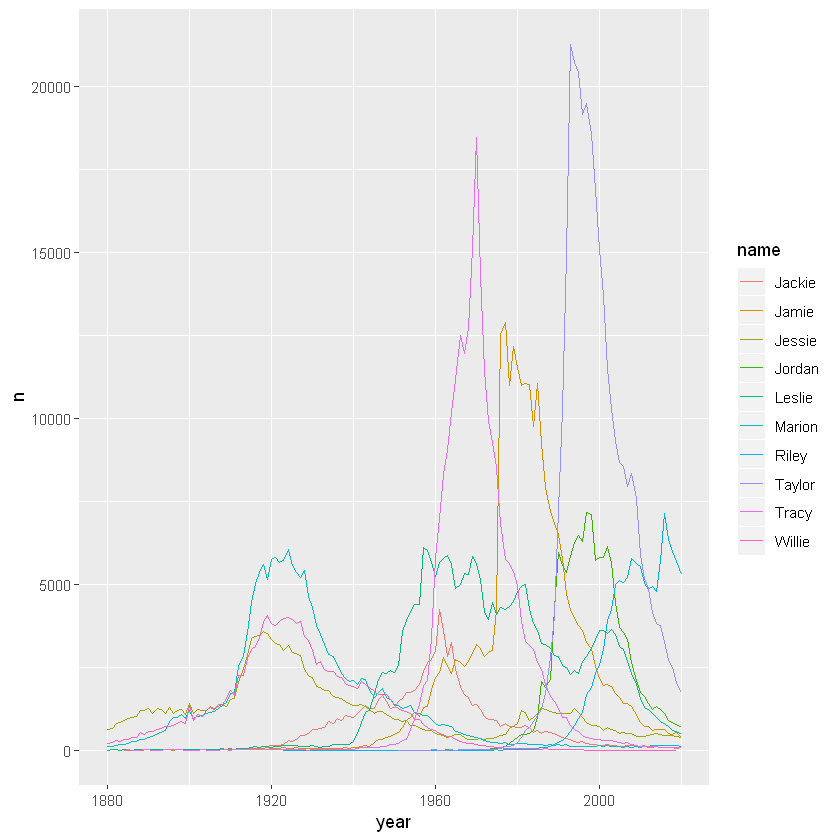

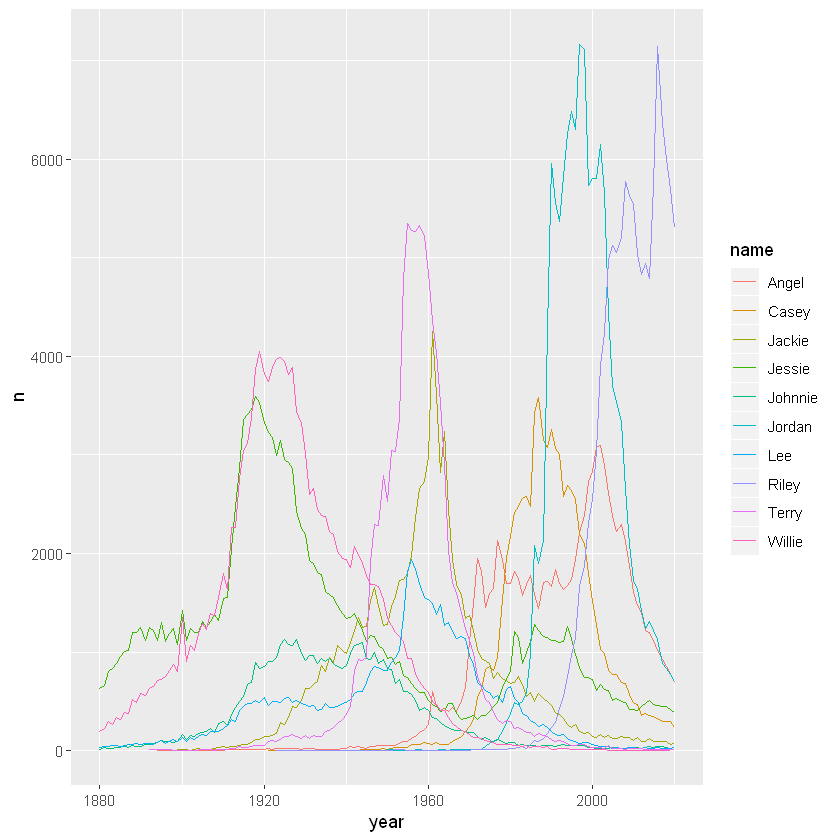

In [10]:
# n is recorded separatedly by diff gender
# n / all_n = F(or M) / F+M
unisex <- babynames %>%
  group_by(year, name) %>%
  mutate(all_n = sum(n)) %>%
  ungroup() %>% #ungroup speeds up the code
  mutate(unisex_prop = n /all_n)

#define a cutoff
unisex$unisex <- ifelse(unisex$unisex_prop>0.2 & unisex$unisex_prop<0.8, 1, 0)

#top10
top10_unisex <- unisex %>%
  filter(unisex == 1) %>%
  group_by(sex, name) %>%
  summarize(total = sum(n),
            unisex_prop = mean(unisex_prop)) %>%
  arrange(desc(total)) %>%
  group_by(sex) %>%
  mutate(rank=row_number()) %>%
  filter(rank<=10)  %>%
  arrange(sex, rank)

top10f_unisex <- top10_unisex %>% filter(sex=="F")
top10m_unisex <- top10_unisex %>% filter(sex=="M")

babynames %>%
  filter(sex=="F") %>%
  filter(name %in% top10f_unisex$name) %>%
  ggplot(., aes(year, n)) +
  geom_line(aes(color=name, group=name)) 

babynames %>%
  filter(sex=="F") %>%
  filter(name %in% top10m_unisex$name) %>%
  ggplot(., aes(year, n)) +
  geom_line(aes(color=name, group=name)) 

# Graph of top 10 female and male names of all time

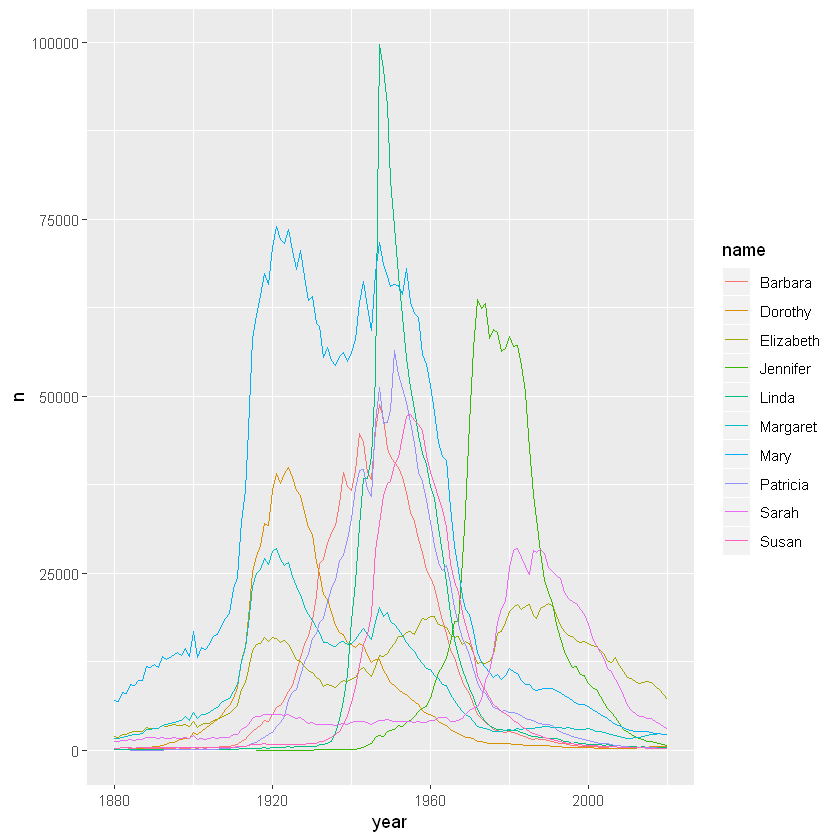

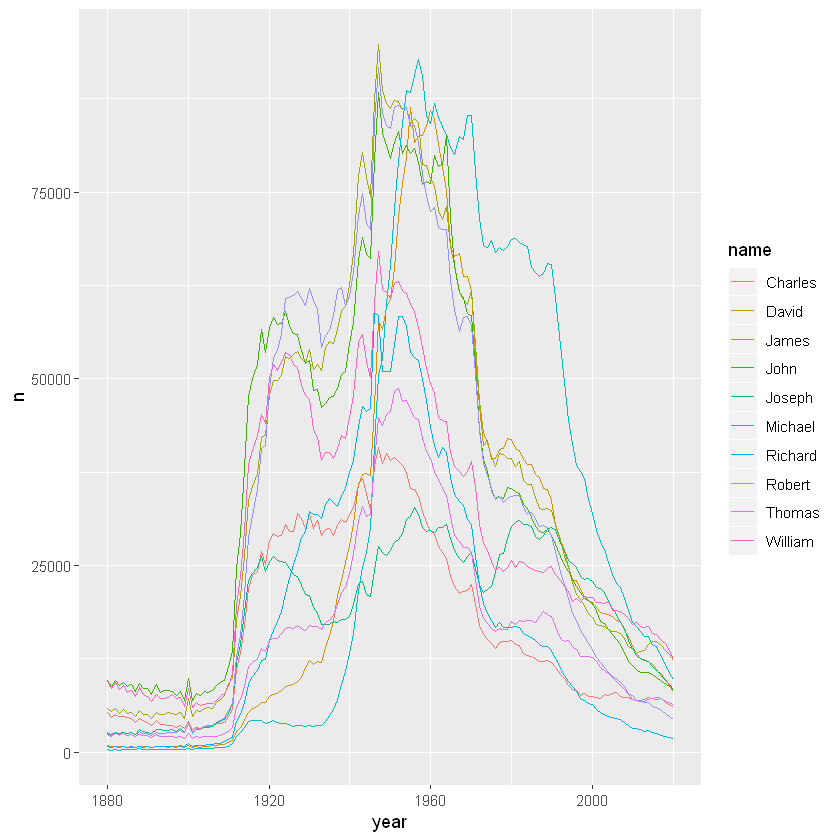

In [11]:
Top10 <- babynames %>%
  group_by(sex, name) %>%
  summarize(total = sum(n)) %>%
  arrange(desc(total)) %>%
  group_by(sex) %>% ## difference start from this line
  mutate(rank=row_number()) %>% ## this is line is important
  filter(rank<=10)  %>%
  arrange(sex, rank)

top10f <- Top10 %>% filter(sex=="F")
top10m <- Top10 %>% filter(sex=="M")

# filter( %in% ), ggplot(.)
babynames %>%
  filter(sex=="F") %>%
  filter(name %in% top10f$name) %>% #   %in% value matching 
  ggplot(., aes(year, n)) +
  geom_line(aes(color=name, group=name))# why use group? 

babynames %>% 
  filter(sex == "M") %>% 
  filter(name %in% top10m$name) %>% 
  ggplot(., aes(year, n)) + 
  geom_line(aes(color = name))

# distribution of selected names over names. 
#Top male, top female, and top unisex

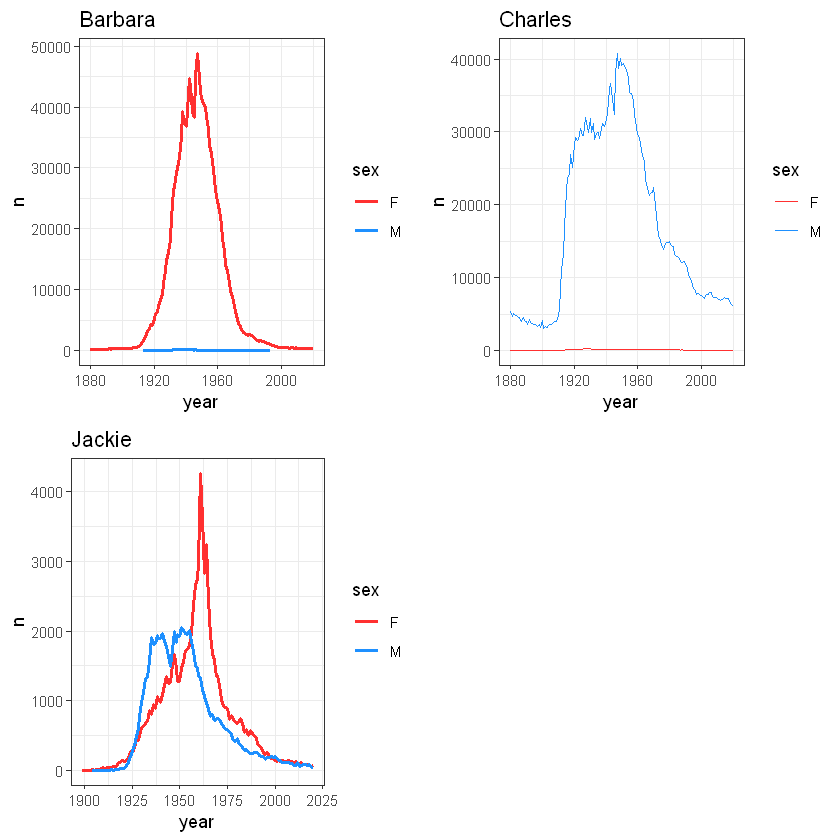

In [19]:
g1 <- babynames %>%
  filter(name=="Barbara") %>% 
  ggplot(., aes(year, n)) +
  geom_line(aes(color=sex), lwd=1) +
  scale_color_manual(values = c("firebrick1", "dodgerblue")) +
  theme_bw() +
  ggtitle("Barbara")

g2 <- babynames %>% 
  filter(name == "Charles") %>% 
  ggplot(., aes(year, n)) +
  aes(color = sex) +
  geom_line() +
  scale_color_manual(values = c("firebrick1", "dodgerblue")) +
  theme_bw() +
  ggtitle("Charles")

g3 <- babynames %>%
  filter(name=="Jackie") %>% 
  ggplot(., aes(year, n)) +
  geom_line(aes(color=sex), lwd=1) +
  scale_color_manual(values = c("firebrick1", "dodgerblue")) +
  theme_bw() +
  ggtitle("Jackie")

grid.arrange(g1,g2,g3,ncol=2)

# most common female&male names 1880 - 1950 vs 1950 - 2020

In [20]:
topf_trad <- babynames %>%  
  filter(year <= 1950, sex == "F") %>% 
  arrange(desc(n)) %>% 
  mutate(rank = row_number()) %>% 
  filter(rank <= 88)
#topf_trad
unique(topf_trad$name)

topf_mod <- babynames %>% 
  filter(year > 1950 & year <= 2020 , sex == "F") %>%
  arrange(desc(n)) %>% 
  mutate(rank = row_number()) %>% 
  filter(rank <= 80)
#topf_mod
unique(topf_mod$name)

topm_trad <- babynames %>% 
  filter(year <= 1950, sex == "M") %>% 
  arrange(desc(n)) %>% 
  mutate(rank = row_number()) %>% 
  filter(rank <= 200)
#topm_trad
unique(topm_trad$name)

topm_mod <- babynames %>% 
  filter(year > 1950 & year <= 2020 , sex == "M") %>% 
  arrange(desc(n)) %>% 
  mutate(rank = row_number()) %>% 
  filter(rank <= 150)
#topm_mod
unique(topm_mod$name)

[1] "Linda"    "Mary"     "Patricia" "Barbara"  "Shirley"  "Dorothy"  "Betty"   
[8] "Susan"    "Helen"

[1] "Linda"    "Mary"     "Jennifer" "Lisa"     "Patricia" "Jessica" 
 [7] "Ashley"   "Deborah"  "Debra"    "Susan"

[1] "James"   "Robert"  "John"    "William" "Michael" "David"   "Richard"
 [8] "Thomas"  "Charles" "Larry"   "Ronald"  "Gary"

[1] "Michael"     "James"       "Robert"      "David"       "John"       
 [6] "William"     "Christopher" "Mark"        "Richard"     "Jason"

# Filter for the names for traditional vs. modern names
#Barbara, Thomas, Jennifer, Christopher

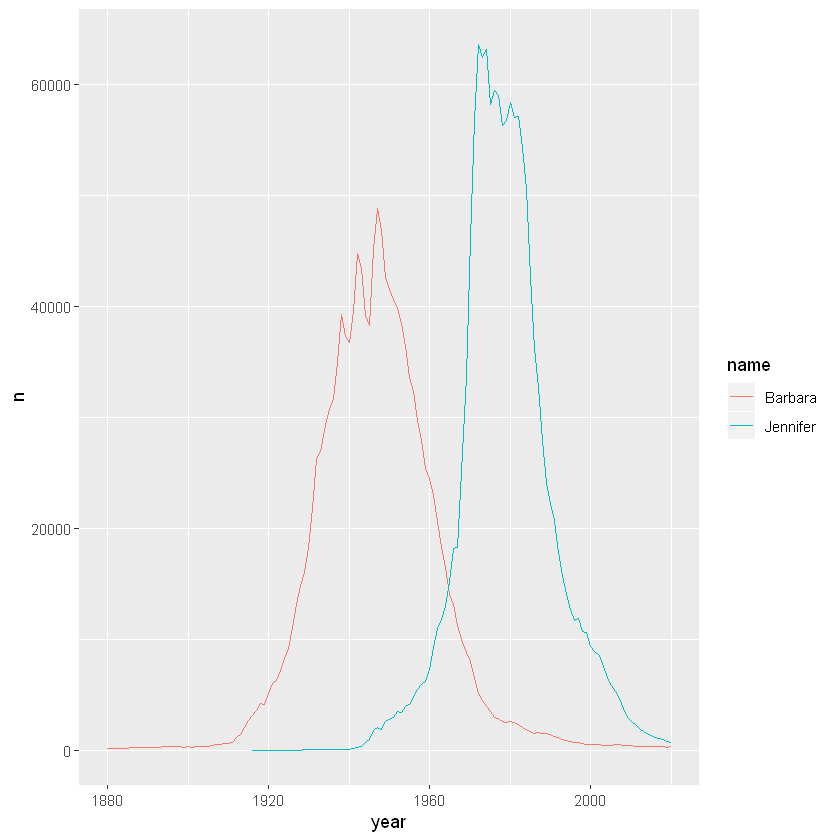

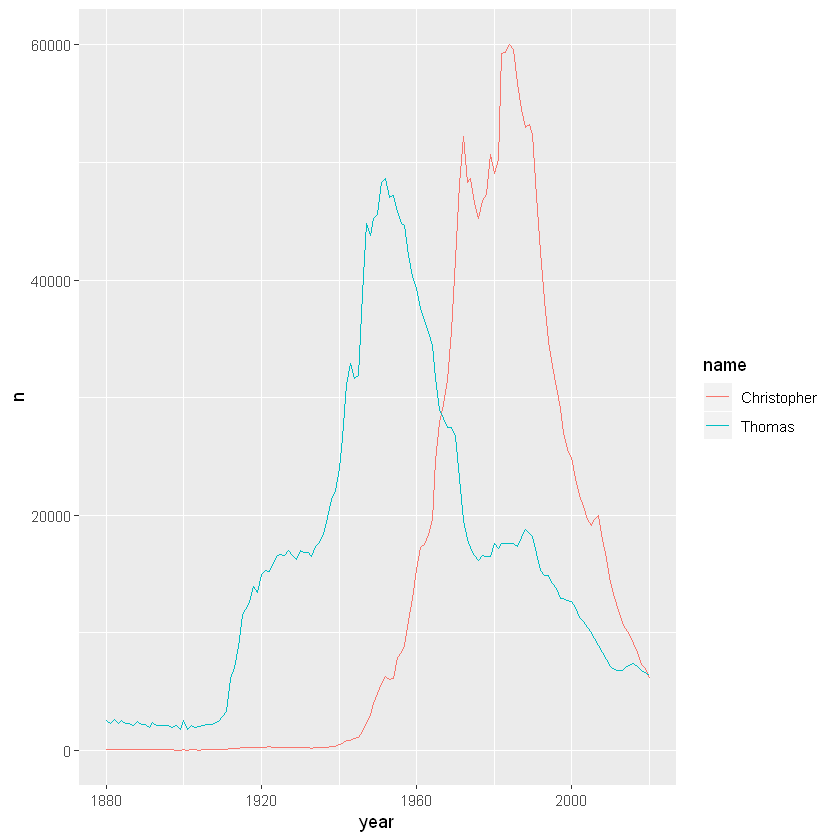

In [21]:
selected_names <- babynames %>%
  filter(name %in% c("Barbara", "Jennifer"), sex == "F")
# Plot the names using a different color for each name
ggplot(selected_names, aes(x=year, y = n, color = name)) +
  geom_line()

selected_names <- babynames %>%
  filter(name %in% c("Thomas", "Christopher"), sex == "M")
# Plot the names using a different color for each name
ggplot(selected_names, aes(x=year, y = n, color = name)) +
  geom_line()

# How many names between 1880-1950 vs. 1951-2020 

In [22]:
babynames %>% 
filter(year <= 1950) %>% 
summary(babynames)

babynames %>% 
filter(year > 1950 & year <= 2020) %>% 
summary(babynames) 
#(why more names after 1950?)

      year          sex                name                 n          
 Min.   :1880   Length:472256      Length:472256      Min.   :    5.0  
 1st Qu.:1914   Class :character   Class :character   1st Qu.:    7.0  
 Median :1926   Mode  :character   Mode  :character   Median :   12.0  
 Mean   :1924                                         Mean   :  215.9  
 3rd Qu.:1938                                         3rd Qu.:   37.0  
 Max.   :1950                                         Max.   :99693.0  

      year          sex                name                 n          
 Min.   :1951   Length:1548607     Length:1548607     Min.   :    5.0  
 1st Qu.:1979   Class :character   Class :character   1st Qu.:    7.0  
 Median :1996   Mode  :character   Mode  :character   Median :   11.0  
 Mean   :1993                                         Mean   :  165.6  
 3rd Qu.:2009                                         3rd Qu.:   30.0  
 Max.   :2020                                         Max.   :92718.0  

# biggest jumps in names

year,sex,name,n,year_total,fraction,ratio
2007,M,Aaban,5,3995740,1.251333e-06,NA
2009,M,Aaban,6,3817731,1.571614e-06,1.2559523
2010,M,Aaban,9,3693163,2.436935e-06,1.5505940
2011,M,Aaban,11,3654691,3.009830e-06,1.2350882
2012,M,Aaban,11,3653979,3.010417e-06,1.0001949
2013,M,Aaban,14,3641604,3.844460e-06,1.2770523
2014,M,Aaban,16,3701784,4.322240e-06,1.1242777
2015,M,Aaban,15,3695531,4.058957e-06,0.9390863
2016,M,Aaban,9,3662277,2.457488e-06,0.6054481
2017,M,Aaban,11,3568294,3.082706e-06,1.2544135


year,sex,name,n,year_total,fraction,ratio
2010,F,Sophia,20646,3693163,0.005590330,2371.375
2001,F,Olivia,13977,3742401,0.003734768,2352.286
2002,F,Isabella,12170,3737195,0.003256453,2031.159
2014,M,Joseph,12131,3701784,0.003277069,2021.833
2016,F,Emma,19522,3662277,0.005330563,1969.926
2016,F,Elizabeth,9572,3662277,0.002613674,1931.783
2013,M,Luke,9577,3641604,0.002629885,1915.400
2011,M,Samuel,11354,3654691,0.003106692,1892.333
2018,F,Charlotte,13005,3505963,0.003709395,1890.887
2015,F,Evelyn,9366,3695531,0.002534413,1876.370


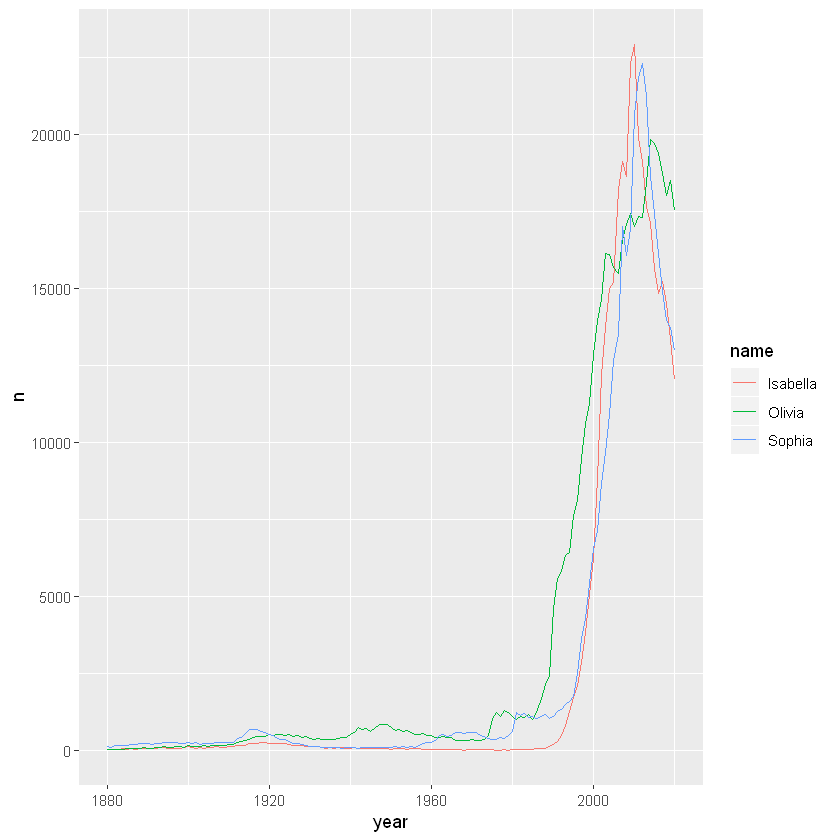

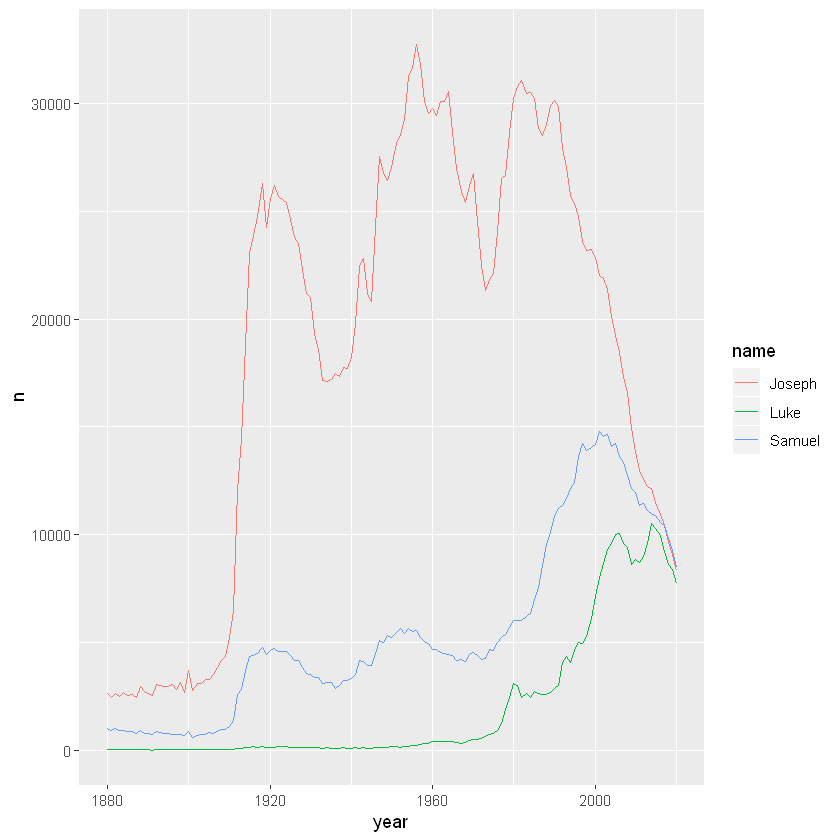

In [23]:
babynames_fraction <- babynames %>%
  group_by(year) %>%
  mutate(year_total = sum(n)) %>%
  ungroup() %>%
  mutate(fraction = n / year_total)

babynames_fraction %>%
  # Arrange the data in order of name, then year 
  arrange(name, year) %>%
  # Group the data by name
  group_by(name) %>%
  # Add a ratio column that contains the ratio between each year 
  mutate(ratio = fraction / lag(fraction))

babynames_ratios_filtered <- babynames_fraction %>%
                     arrange(name, year) %>%
                     group_by(name) %>%
                     mutate(ratio = fraction / lag(fraction)) %>%
                     filter(fraction >= 0.00001)

babynames_ratios_filtered %>%
  # Extract the largest ratio from each name 
  top_n(1, ratio) %>%
  # Sort the ratio column in descending order 
  arrange(desc(ratio)) %>%
  # Filter for fractions greater than or equal to 0.001
  filter(fraction >= 0.001)

#Sophia, Olivia, Isabella
selected_names2 <- babynames %>%
  filter(name %in% c("Sophia", "Olivia", "Isabella"), sex == "F")
# Plot the names using a different color for each name
ggplot(selected_names2, aes(x=year, y = n, color = name)) +
  geom_line()

#Joseph, Luke, Samuel  
selected_names2 <- babynames %>%
  filter(name %in% c("Joseph", "Luke", "Samuel"), sex == "M")
# Plot the names using a different color for each name
ggplot(selected_names2, aes(x=year, y = n, color = name)) +
  geom_line()

# name clustering

Warning message:
"Setting row names on a tibble is deprecated."


    1     2     3     4     5     6 
   19    64   159 68612    11    40 

[1] "Amanda"    "Amy"       "Angela"    "Ashley"    "Christina" "Elizabeth"
 [7] "Heather"   "Jennifer"  "Jessica"   "Kelly"     "Kimberly"  "Laura"    
[13] "Lisa"      "Melissa"   "Michelle"  "Nicole"    "Rebecca"   "Sarah"    
[19] "Stephanie"

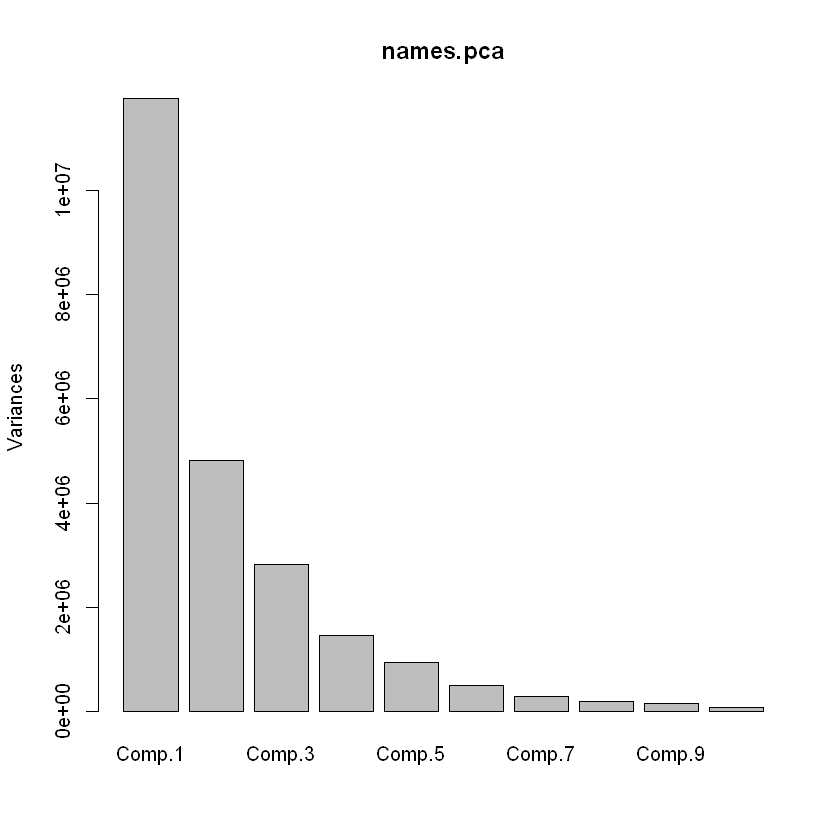


 1  2  3  4  5  6  7 
31  7  4 26 86 22 66 

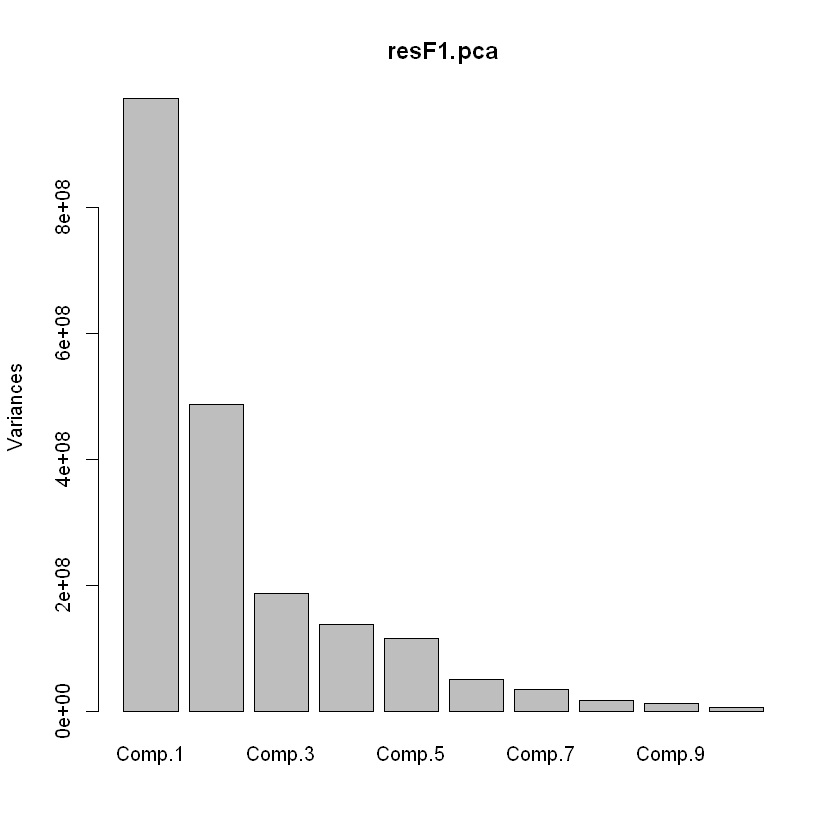

ERROR: Error in tsne(D, k = 2, epoch_callback = ecb, perplexity = 50): could not find function "tsne"


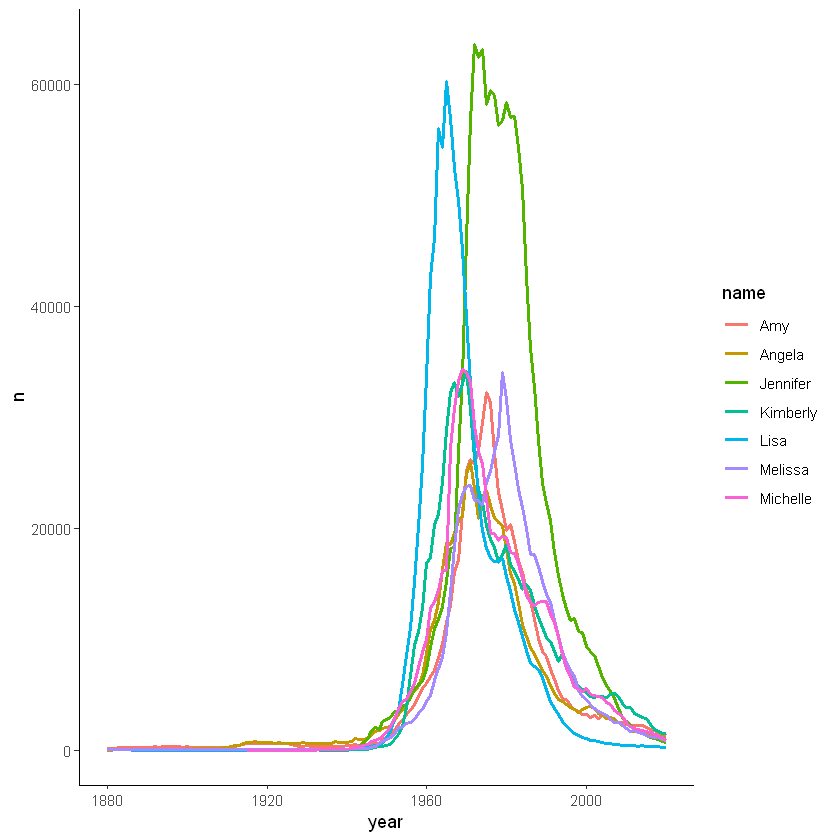

In [24]:
Reshape_Name <- babynames %>%
filter(sex=="F") %>%
select(name, year, n) %>%
spread(year, n, fill=0)

bwf<-Reshape_Name[,2:139] 
rownames(bwf)<- Reshape_Name %>% .$name
names.pca <- princomp(bwf)
plot(names.pca)


set.seed(100)
names.k <- kmeans(bwf, 6)
table(names.k$cluster)
names(names.k$cluster[names.k$cluster==1])

clust1 <- names(names.k$cluster[names.k$cluster<4])
Reshape_Name1 <- Reshape_Name %>% mutate(id = rownames(.))%>% 
filter(!id %in%clust1)

bwf1 <- bwf %>%  filter(rownames(.) %in% clust1) 

### principal components analysis - females
resF1.pca <- princomp(bwf1)
plot(resF1.pca)

set.seed(10)
names <- kmeans(bwf1, 7)
table(names$cluster)

babynames %>%
  filter(sex=="F") %>%
  filter(name %in% clust1[names$cluster==2]) %>% 
  ggplot(aes(year, n)) +
  geom_line(aes(color=name, group=name), lwd=1) +
  theme_classic() 

#similiarity mapping. 
D <- dist(bwf1)  #create distance object


# creating dataframe for plotting colors and text on final plot

cluster1 <- clust1[names$cluster==1]
cluster2 <- clust1[names$cluster==2]
cluster3 <- clust1[names$cluster==3]
cluster4 <- clust1[names$cluster==4]
cluster5 <- clust1[names$cluster==5]
cluster6 <- clust1[names$cluster==6]
cluster7 <- clust1[names$cluster==7]



namesdf <- data.frame(
              name = c(cluster1, cluster2, cluster3, cluster4, 
                       cluster5, cluster6, cluster7), 
              group = c(rep(1, length(cluster1)), 
                        rep(2, length(cluster2)), 
                        rep(3, length(cluster3)), 
                        rep(4, length(cluster4)), 
                        rep(5, length(cluster5)), 
                        rep(6, length(cluster6)), 
                        rep(7, length(cluster7)))
           )
                    

namesdf <- namesdf[match(clust1, namesdf$name),] #names in correct order to match rownames of babywideF1 

colors = rainbow(7)
names(colors) = unique(namesdf$group)


#define function used in plotting
ecb = function(x,y){ plot(x,t='n'); text(x,labels=rownames(bwf1), col=colors[namesdf$group], cex=1) }


set.seed(100)
tsne_D <- tsne(D, k=2,  epoch_callback = ecb, perplexity=50)
namesdf$x <- tsne_D[,1]
namesdf$y <- tsne_D[,2]             

head(namesdf)

ggplot(namesdf, aes(x=x, y=y, color=factor(group), label=name)) +
  geom_text(size=2) +
  theme_classic() +
  theme(legend.position='none')

# comparing the with U.K. (1996 vs 2020 M and F)

In [35]:
#worldcloud
babynames %>%
  filter(year == 1996) %>%     # use only one year
  filter(sex == "F") %>%       # use only one sex
  select(name, n) %>%          # select the two relevant variables: the name and how often it occurs
  top_n(100, n) %>%            # use only the top names or it could get too big
  wordcloud2(size = .5)        # generate the word cloud at a font size of .5

#worldcloud
babynames %>%
  filter(year == 2020) %>%     # use only one year
  filter(sex == "F") %>%       # use only one sex
  select(name, n) %>%          # select the two relevant variables: the name and how often it occurs
  top_n(100, n) %>%            # use only the top names or it could get too big
  wordcloud2(size = .5)        # generate the word cloud at a font size of .5

#worldcloud
babynames %>%
  filter(year == 1996) %>%     # use only one year
  filter(sex == "M") %>%       # use only one sex
  select(name, n) %>%          # select the two relevant variables: the name and how often it occurs
  top_n(100, n) %>%            # use only the top names or it could get too big
  wordcloud2(size = .5)        # generate the word cloud at a font size of .5

#worldcloud
babynames %>%
  filter(year == 2020) %>%     # use only one year
  filter(sex == "M") %>%       # use only one sex
  select(name, n) %>%          # select the two relevant variables: the name and how often it occurs
  top_n(100, n) %>%            # use only the top names or it could get too big
  wordcloud2(size = .5)        # generate the word cloud at a font size of .5


HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)